In [4]:
import numpy as np
import matplotlib.pyplot as plt # plt 用於顯示圖片
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
%matplotlib inline

# 讀取及檢視資料

In [2]:
data_path = 'C:\\Users\\USER\\ml100marathon\\'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

In [3]:
print('train shape:', df_train.shape)
print('test shape:', df_test.shape)
df_train.head()

train shape: (113, 22)
test shape: (33, 21)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


# 資料清洗

In [4]:
df_train.drop("name",inplace=True,axis=1)
df_test.drop("name",inplace=True,axis=1)

In [5]:
# 統計null資料的Frequency
count_nans = len(df_train) - df_train.count()
df_count_nans = count_nans.to_frame()
df_count_nans.columns = ['df_train_nan_count']
df_count_nans["%_df_train_nans"] = (df_count_nans["df_train_nan_count"]/df_train.shape[0]) * 100
# For test data
df_count_nans['df_test_nan_count'] = len(df_test) - df_test.count()
df_count_nans["%_df_test_nans"] = (df_count_nans["df_test_nan_count"]/df_test.shape[0]) * 100

In [6]:
df_count_nans.sort_values("df_train_nan_count",ascending = False,inplace = True)
df_count_nans.query('df_train_nan_count>0 or df_test_nan_count>0')

,df_train_nan_count,%_df_train_nans,df_test_nan_count,%_df_test_nans
loan_advances,111,98.230088,31.0,93.939394
restricted_stock_deferred,103,91.150442,25.0,75.757576
director_fees,100,88.495575,29.0,87.878788
deferral_payments,85,75.221239,22.0,66.666667
deferred_income,79,69.911504,18.0,54.545455
long_term_incentive,64,56.637168,16.0,48.484848
bonus,52,46.017699,12.0,36.363636
from_messages,48,42.477876,12.0,36.363636
from_poi_to_this_person,48,42.477876,12.0,36.363636
from_this_person_to_poi,48,42.477876,12.0,36.363636


In [7]:
# test裡面沒有poi的值，故先刪除train之poi以利合併
df_train.drop("poi",inplace=True,axis=1)

In [8]:
all_data = pd.concat([df_train,df_test])
all_data.reset_index(inplace = True,drop=True)
print(all_data.shape)
all_data.columns
all_data.head()

(146, 20)


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [9]:
# loan_advances,restricted_stock_deferred,director_fees的NA太多，對於分析上的幫助並不大
all_data.drop(['loan_advances','restricted_stock_deferred','director_fees'],axis = 1,inplace = True)

In [10]:
# 因為deferral_payments,deferred_income,long_term_incentive,exercised_stock_options,restricted_stock大多數人可能沒有，故填補0
all_data["deferral_payments"].fillna(0,inplace = True)
all_data["deferred_income"].fillna(0,inplace = True)
all_data["long_term_incentive"].fillna(0,inplace = True)
all_data["exercised_stock_options"].fillna(0,inplace = True)
all_data["restricted_stock"].fillna(0,inplace = True)
# 由於下面變數的值,從直方圖觀察到多是偏態,故使用較不受影響的中位數來填補
# from_messages,bonus,from_poi_to_this_person,from_this_person_to_poi,to_messages 填補中位數
# shared_receipt_with_poi,other,expenses,salary,total_payments,total_stock_value 填補中位數
all_data["from_messages"].fillna(np.median(all_data[~all_data['from_messages'].isnull()]['from_messages']),inplace = True)
all_data["bonus"].fillna(np.median(all_data[~all_data['bonus'].isnull()]['bonus']),inplace = True)
all_data["from_poi_to_this_person"].fillna(np.median(all_data[~all_data['from_poi_to_this_person'].isnull()]['from_poi_to_this_person']),inplace = True)
all_data["from_this_person_to_poi"].fillna(np.median(all_data[~all_data['from_this_person_to_poi'].isnull()]['from_this_person_to_poi']),inplace = True)
all_data["to_messages"].fillna(np.median(all_data[~all_data['to_messages'].isnull()]['to_messages']),inplace = True)
all_data["shared_receipt_with_poi"].fillna(np.median(all_data[~all_data['shared_receipt_with_poi'].isnull()]['shared_receipt_with_poi']),inplace = True)
all_data["other"].fillna(np.median(all_data[~all_data['other'].isnull()]['other']),inplace = True)
all_data["expenses"].fillna(np.median(all_data[~all_data['expenses'].isnull()]['expenses']),inplace = True)
all_data["salary"].fillna(np.median(all_data[~all_data['salary'].isnull()]['salary']),inplace = True)
all_data["total_payments"].fillna(np.median(all_data[~all_data['total_payments'].isnull()]['total_payments']),inplace = True)
all_data["total_stock_value"].fillna(np.median(all_data[~all_data['total_stock_value'].isnull()]['total_stock_value']),inplace = True)
#email_address 填補None
all_data["email_address"].fillna('None',inplace = True)

# 檢視 Outliers

Numbers of remain columns: 16


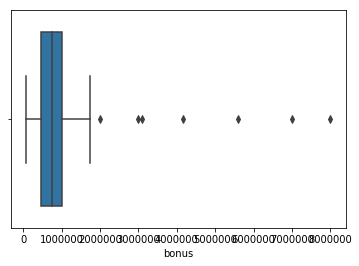

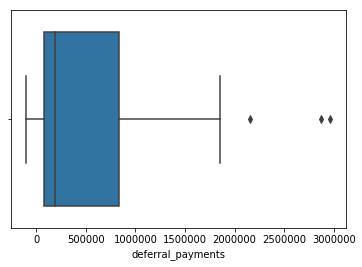

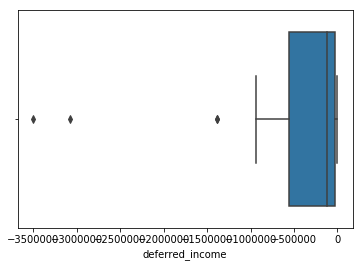

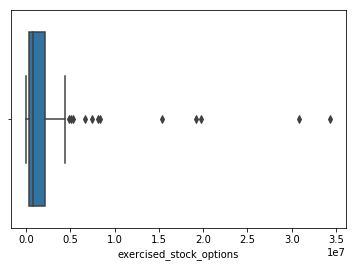

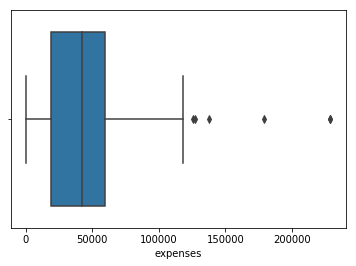

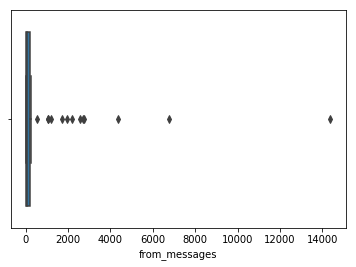

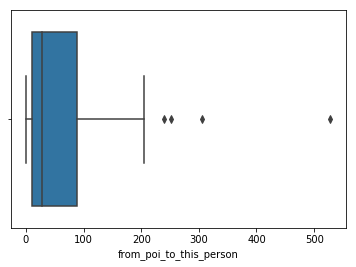

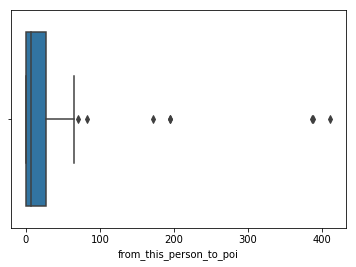

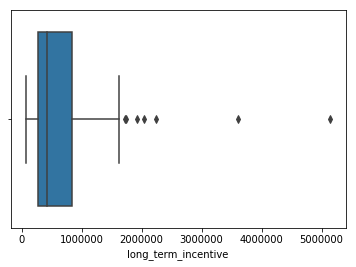

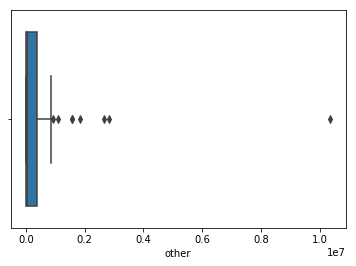

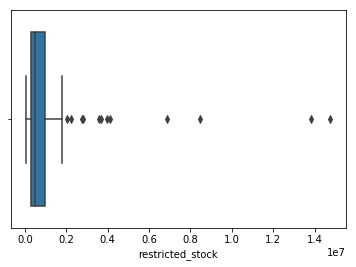

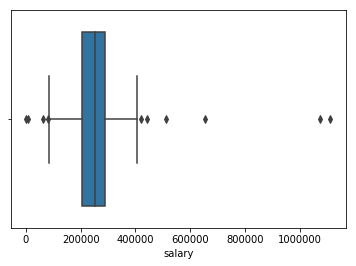

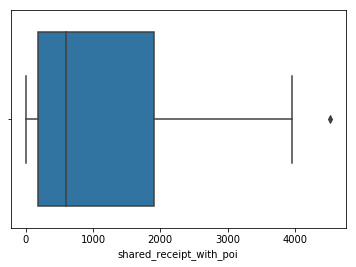

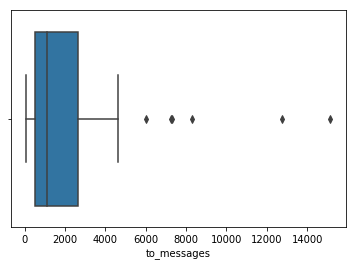

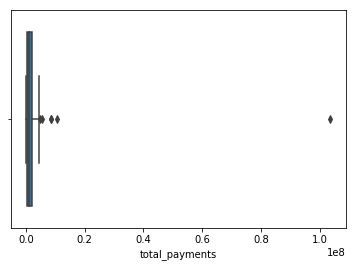

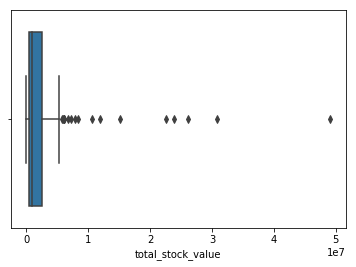

In [11]:
# 先篩選數值型的欄位

dtype_select = [np.dtype('int64'), np.dtype('float64')]

numeric_columns = list(all_data.columns[list(all_data.dtypes.isin(dtype_select))])

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(df_train[numeric_columns].columns[list(df_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns: %i" % len(numeric_columns))

# 檢視這些欄位的數值範圍
for col in numeric_columns:
    sns.boxplot(df_train[col])
    plt.show()

In [63]:
numeric_columns

['bonus',
 'deferral_payments',
 'deferred_income',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

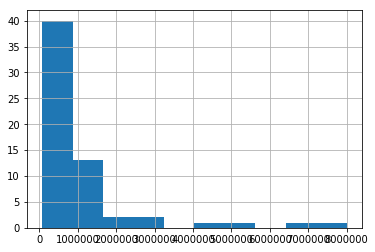

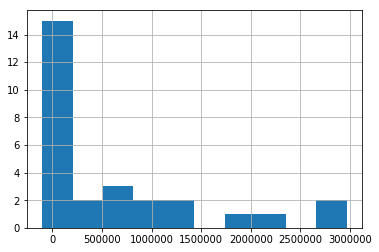

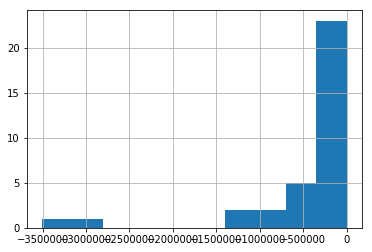

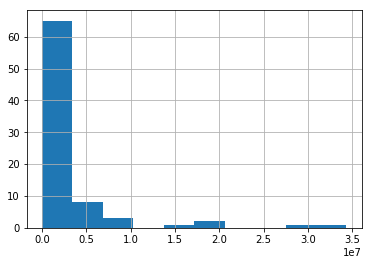

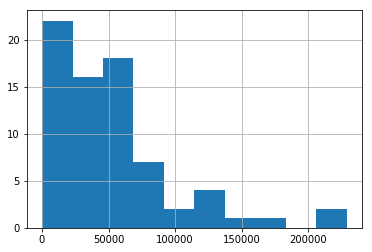

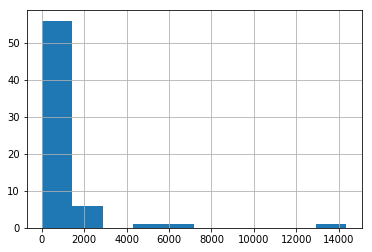

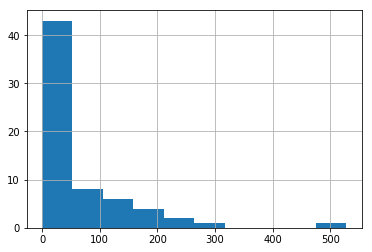

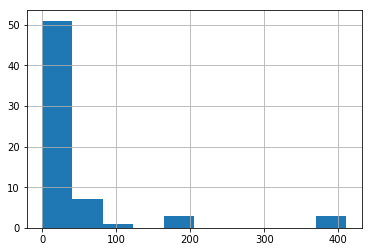

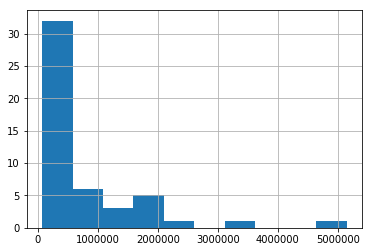

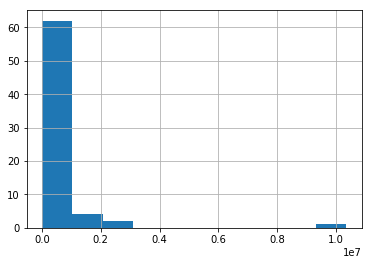

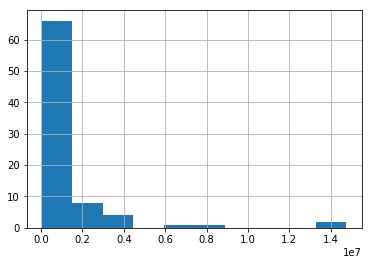

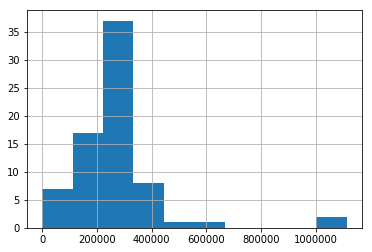

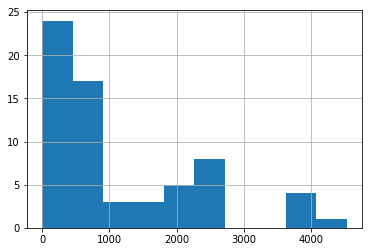

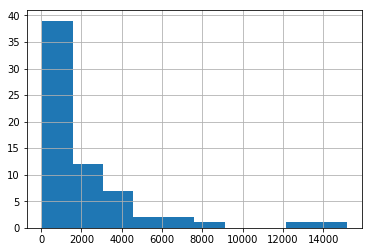

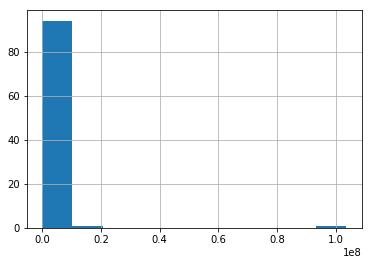

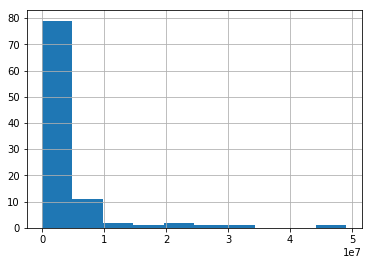

In [64]:
for col in numeric_columns:
    df_train[col].hist()
    plt.show()

In [65]:
# from_messages
# other
# shared_receipt_with_poi
# total_payments
#以上為看其來比較可疑的特徵

count      146.000000
mean       375.452055
std       1437.174998
min         12.000000
25%         36.000000
50%         41.000000
75%         51.250000
max      14368.000000
Name: from_messages, dtype: float64


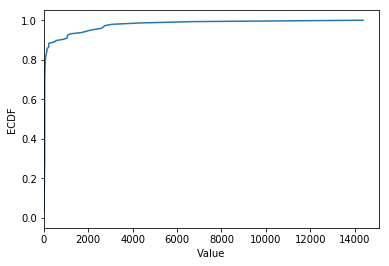

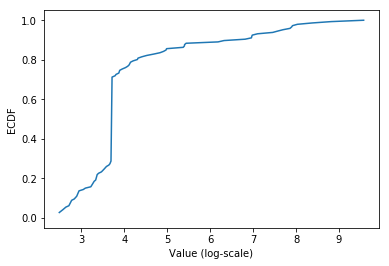

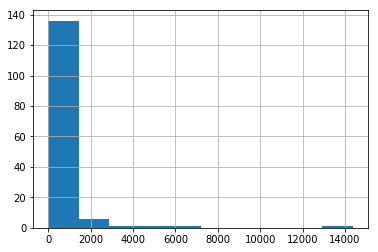

In [66]:
# 最大值離平均與中位數很遠
print(all_data['from_messages'].describe())
# 繪製 Empirical Cumulative Density Plot (ECDF)

cdf = all_data.from_messages.value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()
all_data['from_messages'].hist()
plt.show()

count    1.460000e+02
mean     6.044472e+05
std      3.679386e+06
min      2.000000e+00
25%      2.686500e+03
50%      5.238200e+04
75%      1.506065e+05
max      4.266759e+07
Name: other, dtype: float64


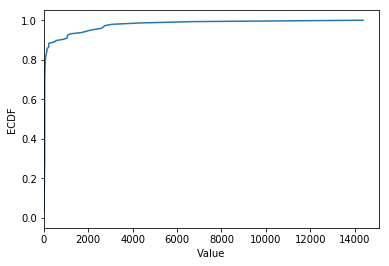

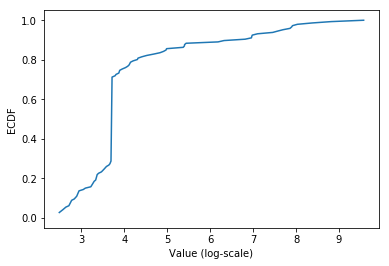

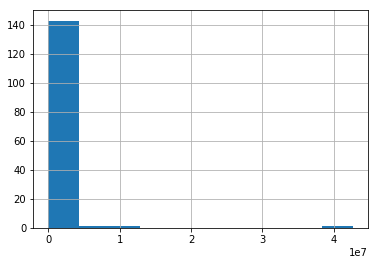

In [67]:
# 最大值離平均與中位數很遠
print(all_data['other'].describe())
# 繪製 Empirical Cumulative Density Plot (ECDF)

cdf = all_data.from_messages.value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()
all_data['other'].hist()
plt.show()

count     146.000000
mean      997.301370
std       927.488807
min         2.000000
25%       591.500000
50%       740.500000
75%       893.500000
max      5521.000000
Name: shared_receipt_with_poi, dtype: float64


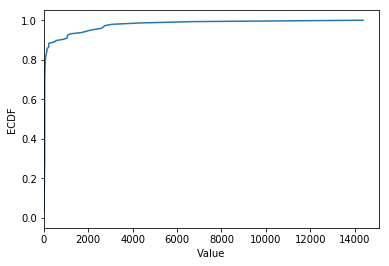

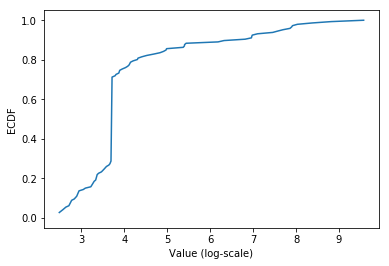

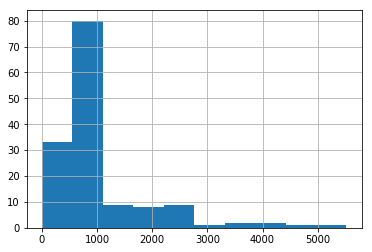

In [68]:
# 最大值離平均與中位數很遠
print(all_data['shared_receipt_with_poi'].describe())
# 繪製 Empirical Cumulative Density Plot (ECDF)

cdf = all_data.from_messages.value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()
all_data['shared_receipt_with_poi'].hist()
plt.show()
# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，只是分享次數高的地方比較疏漏

count    1.460000e+02
mean     4.509042e+06
std      2.691150e+07
min      1.480000e+02
25%      5.544675e+05
50%      1.101393e+06
75%      1.968287e+06
max      3.098866e+08
Name: total_payments, dtype: float64


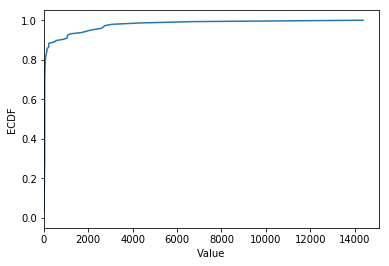

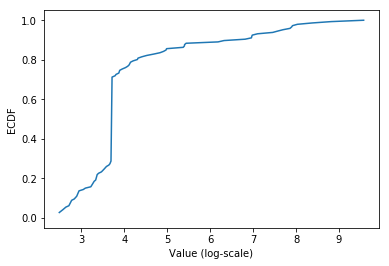

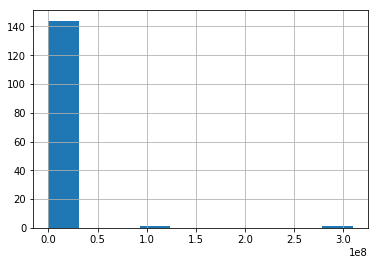

In [69]:
# 最大值離平均與中位數很遠
print(all_data['total_payments'].describe())
# 繪製 Empirical Cumulative Density Plot (ECDF)

cdf = all_data.from_messages.value_counts().sort_index().cumsum()


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()
all_data['total_payments'].hist()
plt.show()

# 處理 Outliers

In [12]:
print("== Original data range ==")
print(all_data['from_messages'].describe())

def normalize_value(x):
    x = (( (x - min(x)) / ( max(x) - min(x) ) ) - 0.5) * 2
    return x

all_data['from_messages_NORMALIZED'] = normalize_value(all_data['from_messages'])

print("== Normalized data range ==")
all_data['from_messages_NORMALIZED'].describe()

== Original data range ==
count      146.000000
mean       375.452055
std       1437.174998
min         12.000000
25%         36.000000
50%         41.000000
75%         51.250000
max      14368.000000
Name: from_messages, dtype: float64
== Normalized data range ==


count    146.000000
mean      -0.949366
std        0.200219
min       -1.000000
25%       -0.996656
50%       -0.995960
75%       -0.994532
max        1.000000
Name: from_messages_NORMALIZED, dtype: float64

In [13]:
print("== Original data range ==")
print(all_data['other'].describe())

def normalize_value(x):
    x = (( (x - min(x)) / ( max(x) - min(x) ) ) - 0.5) * 2
    return x

all_data['other_NORMALIZED'] = normalize_value(all_data['other'])

print("== Normalized data range ==")
all_data['other_NORMALIZED'].describe()

== Original data range ==
count    1.460000e+02
mean     6.044472e+05
std      3.679386e+06
min      2.000000e+00
25%      2.686500e+03
50%      5.238200e+04
75%      1.506065e+05
max      4.266759e+07
Name: other, dtype: float64
== Normalized data range ==


count    146.000000
mean      -0.971667
std        0.172468
min       -1.000000
25%       -0.999874
50%       -0.997545
75%       -0.992941
max        1.000000
Name: other_NORMALIZED, dtype: float64

In [14]:
print("== Original data range ==")
print(all_data['total_payments'].describe())

def normalize_value(x):
    x = (( (x - min(x)) / ( max(x) - min(x) ) ) - 0.5) * 2
    return x

all_data['total_payments_NORMALIZED'] = normalize_value(all_data['total_payments'])

print("== Normalized data range ==")
all_data['total_payments_NORMALIZED'].describe()

== Original data range ==
count    1.460000e+02
mean     4.509042e+06
std      2.691150e+07
min      1.480000e+02
25%      5.544675e+05
50%      1.101393e+06
75%      1.968287e+06
max      3.098866e+08
Name: total_payments, dtype: float64
== Normalized data range ==


count    146.000000
mean      -0.970900
std        0.173686
min       -1.000000
25%       -0.996422
50%       -0.992893
75%       -0.987298
max        1.000000
Name: total_payments_NORMALIZED, dtype: float64

In [15]:
# 去除相關係數較高特徵的偏態
all_data['restricted_stock'] = np.log1p(all_data['restricted_stock'])
all_data['total_payments'] = np.log1p(all_data['total_payments'])
all_data['total_stock_value'] = np.log1p(all_data['total_stock_value'])
all_data['exercised_stock_options'] = np.log1p(all_data['exercised_stock_options'])
all_data['salary'] = np.log1p(all_data['salary'])

C:\Users\USER\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  
C:\Users\USER\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


In [16]:
# 分別將資產跟薪水收入支付作特徵組合(我認為嫌疑犯的可能性跟淨值及盈餘有關係)
all_data['stock_diff'] = all_data['total_stock_value'] - all_data['restricted_stock']
all_data['reminder_diff'] = all_data['salary'] - all_data['total_payments']
all_data['distance_2D'] = (all_data['stock_diff']**2 + all_data['reminder_diff']**2)**0.5
all_data[['distance_2D', 'stock_diff', 'reminder_diff']].head()

,distance_2D,stock_diff,reminder_diff
0,2.112330,2.104398,-0.182889
1,2.453102,1.338368,-2.055841
2,2.481864,1.053892,-2.246989
3,2.470289,0.000000,-2.470289
4,1.920593,0.000000,-1.920593


In [17]:
# 將all_data分為train和test
df_tr=all_data.iloc[:113,:]
df_te=all_data.iloc[113:,:]
df_tr.drop("email_address",inplace=True,axis=1)
df_te.drop("email_address",inplace=True,axis=1)

print(df_tr.shape)
print(df_te.shape)

(113, 22)
(33, 22)


C:\Users\USER\Anaconda3\envs\py3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
df_tr.fillna(df_tr.mean(), inplace=True)
df_te.fillna(df_te.mean(), inplace=True)

C:\Users\USER\Anaconda3\envs\py3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor

# LASSO

In [94]:
# 訓練樣本個數
train_rows = df_tr.shape[0]
# 合併編碼後的訓練數據和測試數據
X_leaves = np.concatenate((df_tr, df_te), axis=0)
X_leaves = X_leaves.astype(np.int32)
(rows, cols) = X_leaves.shape



# 對所有特徵進行ont-hot編碼
xgbenc = OneHotEncoder(categories='auto')
X_trans = xgbenc.fit_transform(X_leaves)







# 組合特徵
X_train_ext = hstack([X_trans[:train_rows, :], df_tr])
X_test_ext = hstack([X_trans[train_rows:, :], df_te])

train = pd.read_csv(data_path + 'train_data.csv')
# 建立模型
lasso = linear_model.Lasso(alpha=0.0001)

# 訓練模型
lasso.fit(X_train_ext, train['poi'])

# 預測測試集
y_pred = lasso.predict(X_test_ext)


In [96]:
test = pd.read_csv(data_path + 'test_features.csv')
data = {'name': test['name']}
submit = pd.DataFrame(data)
submit['poi'] = abs(y_pred)

submit.head()

,name,poi
0,BELDEN TIMOTHY N,0.009834
1,BOWEN JR RAYMOND M,0.007799
2,HANNON KEVIN P,0.045109
3,DELAINEY DAVID W,0.022261
4,CAUSEY RICHARD A,0.015917


In [80]:
submit.to_csv('poi_predLASSO.csv', index = False)

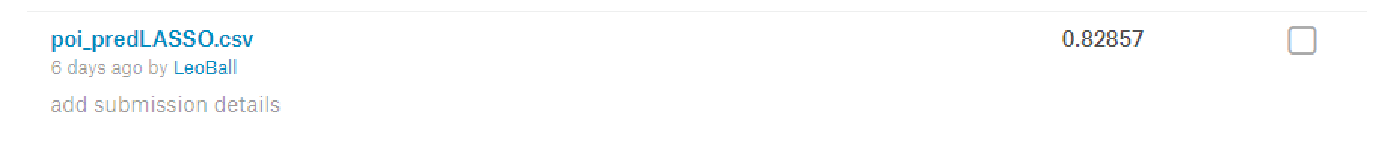

In [9]:
plt.figure(figsize=(24,24)) 
lasso = mpimg.imread('lasso_late.png')
plt.imshow(lasso)
plt.axis('off') # 不顯示座標軸
plt.show()

# 梯度提升機+LASSO

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import  OneHotEncoder
from scipy.sparse import hstack

In [22]:
train = pd.read_csv(data_path + 'train_data.csv')
# 建立模型
clf = GradientBoostingRegressor()

# 訓練模型
clf.fit(df_tr, train['poi'])

# 預測測試集
y_pred = clf.predict(df_te)

In [23]:
boost = clf
X_train_leaves = boost.apply(df_tr.values)
X_test_leaves = boost.apply(df_te.values)

# 訓練樣本個數
train_rows = X_train_leaves.shape[0]
# 合併編碼後的訓練數據和測試數據
X_leaves = np.concatenate((X_train_leaves, X_test_leaves), axis=0)
X_leaves = X_leaves.astype(np.int32)
(rows, cols) = X_leaves.shape



# 對所有特徵進行ont-hot編碼
xgbenc = OneHotEncoder()
X_trans = xgbenc.fit_transform(X_leaves)






# 建立模型
lr = linear_model.Lasso(alpha=0.0001)
# 組合特徵
X_train_ext = hstack([X_trans[:train_rows, :], df_tr])
X_test_ext = hstack([X_trans[train_rows:, :], df_te])
# 訓練模型
lr.fit(X_train_ext, train['poi'])
# 預測測試集
y_pred = lr.predict(X_test_ext)



C:\Users\USER\Anaconda3\envs\py3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\USER\Anaconda3\envs\py3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [25]:
test = pd.read_csv(data_path + 'test_features.csv')
data = {'name': test['name']}
submit = pd.DataFrame(data)
submit['poi'] = abs(y_pred)

submit.head()

,name,poi
0,BELDEN TIMOTHY N,0.639723
1,BOWEN JR RAYMOND M,0.369337
2,HANNON KEVIN P,0.816983
3,DELAINEY DAVID W,0.103584
4,CAUSEY RICHARD A,0.511370


In [26]:
submit.to_csv('poi_predGBLASSO.csv', index = False)

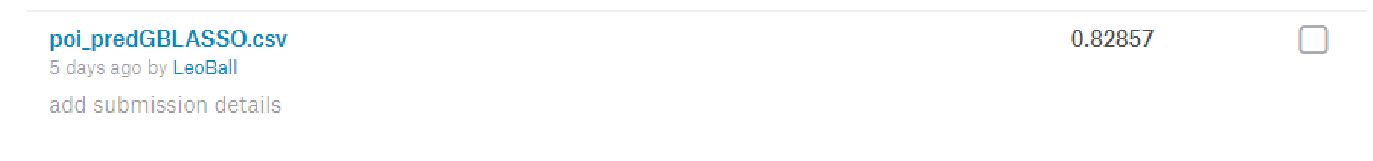

In [10]:
plt.figure(figsize=(24,24)) 
gb = mpimg.imread('gb_lasso.png')
plt.imshow(gb)
plt.axis('off') # 不顯示座標軸
plt.show()

# 隨機森林

In [93]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [94]:
# 建立模型
clf = RandomForestRegressor()

# 訓練模型
clf.fit(df_tr, train['poi'])

# 預測測試集
y_pred = clf.predict(df_te)

In [95]:
data = {'name': test['name']}
submit = pd.DataFrame(data)
submit['poi'] = abs(y_pred)

submit.head()

,name,poi
0,BELDEN TIMOTHY N,0.4
1,BOWEN JR RAYMOND M,0.1
2,HANNON KEVIN P,0.0
3,DELAINEY DAVID W,0.0
4,CAUSEY RICHARD A,0.3


In [96]:
submit.to_csv('poi_predRF.csv', index = False)

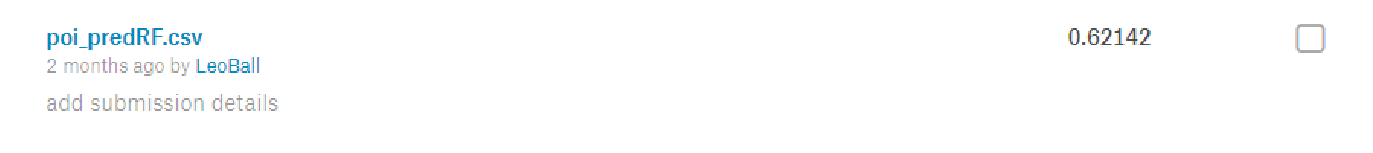

In [14]:
plt.figure(figsize=(24,24)) 
RF = mpimg.imread('RF.png')
plt.imshow(RF)
plt.axis('off') # 不顯示座標軸
plt.show()

# 截止前最高分數

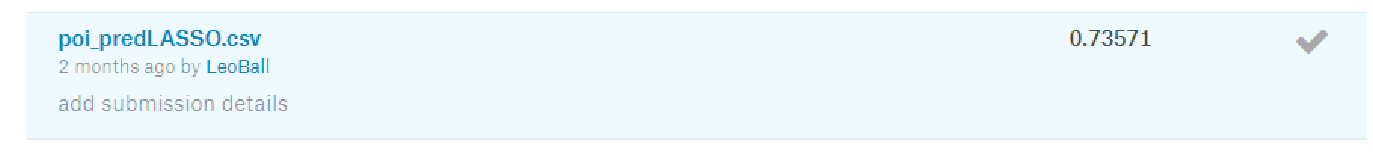

In [13]:
# LASSO
plt.figure(figsize=(24,24)) 
las = mpimg.imread('lasso.png')
plt.imshow(las)
plt.axis('off') # 不顯示座標軸
plt.show()

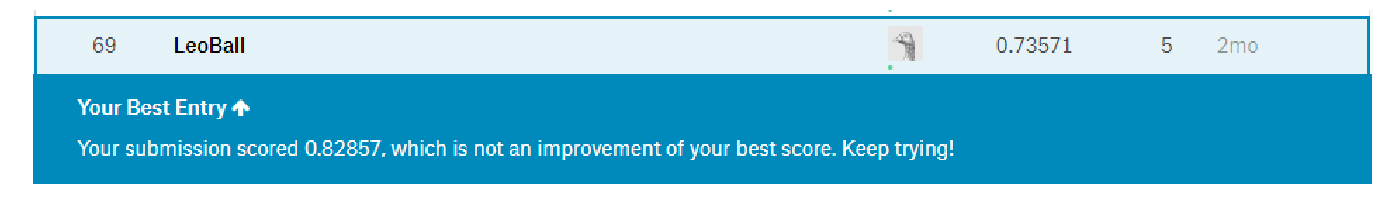

In [11]:
plt.figure(figsize=(24,24)) 
score = mpimg.imread('score.png')
plt.imshow(score)
plt.axis('off') # 不顯示座標軸
plt.show()

# 最佳成績

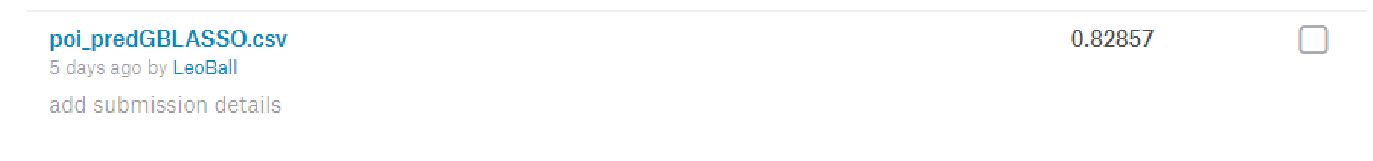

In [12]:
plt.figure(figsize=(24,24)) 
gb = mpimg.imread('gb_lasso.png')
plt.imshow(gb)
plt.axis('off') # 不顯示座標軸
plt.show()

In [ ]:
### 雙模型參考網址:https://zhuanlan.zhihu.com/p/42123341